
# <center> Classification The Forest Cover Type From Region Cell</center>
### <center>Yue Lyu (V00902738) <br>Marvi Jokhio (V00926175)<center> 
### <center> Department of Computer Science, University of Victoria<center>


### <center> Introduction<center>
We want to solve the Forest Cover Type Problem (Kaggle.com, 2019). The goal is  to predict an integer classification for the forest cover type (the predominant kind of tree cover) from strictly cartographic variables (as opposed to remotely sensed data). The actual forest cover type for a given 30 x 30 meter cell was determined from US Forest Service (USFS) Region 2 Resource Information System data. Independent variables were then derived from data obtained from the US Geological Survey and USFS. The data is in raw form (not scaled) and contains binary columns of data for qualitative independent variables such as wilderness areas and soil type.
This study area includes four wilderness areas located in the Roosevelt National Forest of northern Colorado. These areas represent forests with minimal human-caused disturbances, so that existing forest cover types are more a result of ecological processes rather than forest management practices.
The seven types are:

1 - Spruce/Fir <br>
2 - Lodgepole Pine <br>
3 - Ponderosa Pine <br>
4 - Cottonwood/Willow <br>
5 - Aspen <br>
6 - Douglas-fir <br>
7 - Krummholz <br>

The dataset (15120 observations) contains both features and the Cover_Type. We will split the dataset into 80% for training testing and 20% as unseen data for predicting.

### Contents
#### 1 Introduction 

#### 2 Data Preprocessing 
    2.1 Raw data and structure analysis 
    2.2 Dataset preparation
    2.3 Data transformation 
    2.4 Data visualization
        2.4.1 missing value
        2.4.2 outlier
    2.5 Feature Engineering
    2.6 Normalization
#### 3 Analysis, Results and Discussion
    3.1 Methods and Algorithms used
    3.2 Experimental Process
    3.3 Results and Discussion
#### 4 Evaluation on unseen data  
#### 5 Conclusion and Future work


Claim 1:
The models we choose provide a good enough mean accuracy of about 80% for ‘data B’ which has only 6 features (i-e extracted by us) and is as half the number of original transformed dataset ‘Data A’. Next, we do optimization for selected models i-e Random Forest and ExtraTree classifier.

Claim 2:
Based on all the results and prediction accuracy discussed, we can claim that we are confident that our model can do good predication for 5 cover Types from 7 excluding cover Type 1 and 2.

## 2 Data Preprocessing 
### 2.1 Raw data and structure analysis
The raw data are obtained from the US Geological Survey and USFS.
We obtained the datasets from the problem page on kaggle competition. The dataset (15120 observations) contains features and the class Cover_Type. To train and test the Cover_Type for every row in the dataset by crossvalidation. It has identical atrributes as followed:

Attributes<br>
There are 12 features / attributes as following:<br>
<strong>Elevation</strong> - Elevation in meters, <strong>numerical</strong><br>
<strong>Aspect</strong> - Aspect in degrees azimuth, <strong>numerical</strong> <br>
<strong>Slope</strong> - Slope in degrees, <strong>numerical</strong> <br>
<strong>Horizontal_Distance_To_Hydrology</strong> - Horz Dist to nearest surface water features, <strong>numerical</strong> <br>
<strong>Vertical_Distance_To_Hydrology</strong> - Vert Dist to nearest surface water features,  <strong>numerical</strong> <br>
<strong>Horizontal_Distance_To_Roadways</strong> - Horz Dist to nearest roadway, <strong>numerical</strong><br>
<strong>Hillshade_9am</strong>  (0 to 255 index) - Hillshade index at 9am, summer solstice, <strong>numerical</strong> <br>
<strong>Hillshade_Noon</strong>  (0 to 255 index) - Hillshade index at noon, summer solstice,  <strong>numerical</strong> <br>
<strong>Hillshade_3pm</strong>  (0 to 255 index)- Hillshade index at 3pm, summer solstice, <strong>numerical</strong> <br>
<strong>Horizontal_Distance_To_Fire_Points</strong> - Horz Dist to nearest wildfire ignition points, <strong>numerical</strong> <br>
<strong>Wilderness_Area</strong> (4 binary columns, 0 = absence or 1 = presence) - Wilderness area designation, <strong>categorical</strong> <br>
<strong>Soil_Type</strong> (40 binary columns, 0 = absence or 1 = presence) - Soil Type designation, <strong>categorical</strong><br>

Class<br>
<strong>Cover_Type</strong> (7 types, integers 1 to 7) - Forest Cover Type designation, <strong>categorical</strong><br>

Statistic information
![avatar](des.png)

In [2]:
#!pip install pandas
#!pip install numpy
#!pip install matplotlib
#!pip install plotly
#!pip install missingno

# linear algebra
import numpy as np 

# data processing
import pandas as pd 

# Data visualization
import matplotlib.pyplot as plt
import matplotlib.style as psy
#%matplotlib inline

# Set seaborn scheme
import seaborn as sns
sns.set(style="whitegrid")

# Displaying figure
import plotly.graph_objects as go

# Generating offline graphs within notebook
import plotly.offline as plf
plf.init_notebook_mode(connected=True)

import missingno as msno
from sklearn import preprocessing
from matplotlib import rc
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.offline as offline
import plotly.graph_objs as go
import matplotlib
matplotlib.use('TkAgg')

#### 2.2 Dataset Preparation 
After importing the information into the database we analyzed each single feature to have a view of the datasets.
We generate the feature names into lists, and mapping the type names to integer value for simply using in the future.

We find out that 40 columns of Soil_Type which have binary value to indicate absence or presence could be integrated into one single column with categorical integer value from 1 to 40. As well as four binary columns Wilderness_Area, we could integrate them into one single column with categorical integer value from 1 to 4. So we do the transformation to build two new features to replace original ones.

Then we check the dataset for missing values and outliers as the data preparation for future using and do the coreesponding processing (like repalce a default value for the missing value).


In [3]:
#Data screening
train_df = pd.read_csv("train.csv")
train_df.head()

Id  Elevation  Aspect  Slope  Horizontal_Distance_To_Hydrology  \
0   1       2596      51      3                               258   
1   2       2590      56      2                               212   
2   3       2804     139      9                               268   
3   4       2785     155     18                               242   
4   5       2595      45      2                               153   

   Vertical_Distance_To_Hydrology  Horizontal_Distance_To_Roadways  \
0                               0                              510   
1                              -6                              390   
2                              65                             3180   
3                             118                             3090   
4                              -1                              391   

   Hillshade_9am  Hillshade_Noon  Hillshade_3pm  ...  Soil_Type32  \
0            221             232            148  ...            0   
1            220             235            151  ...            0   
2            234             238            135  ...            0   
3            238             238            122  ...            0   
4            220             234            150  ...            0   

   Soil_Type33  Soil_Type34  Soil_Type35  Soil_Type36  Soil_Type37  \
0            0            0            0            0            0   
1            0            0            0            0            0   
2            0            0            0            0            0   
3            0            0            0            0            0   
4            0            0            0            0            0   

   Soil_Type38  Soil_Type39  Soil_Type40  Cover_Type  
0            0            0            0           5  
1            0            0            0           5  
2            0            0            0           2  
3            0            0            0           2  
4            0            0            0           5  

[5 rows x 56 columns]

**To studies the statistic information according to the features**

In [4]:
train_df.describe()

Id     Elevation        Aspect         Slope  \
count  15120.00000  15120.000000  15120.000000  15120.000000   
mean    7560.50000   2749.322553    156.676653     16.501587   
std     4364.91237    417.678187    110.085801      8.453927   
min        1.00000   1863.000000      0.000000      0.000000   
25%     3780.75000   2376.000000     65.000000     10.000000   
50%     7560.50000   2752.000000    126.000000     15.000000   
75%    11340.25000   3104.000000    261.000000     22.000000   
max    15120.00000   3849.000000    360.000000     52.000000   

       Horizontal_Distance_To_Hydrology  Vertical_Distance_To_Hydrology  \
count                      15120.000000                    15120.000000   
mean                         227.195701                       51.076521   
std                          210.075296                       61.239406   
min                            0.000000                     -146.000000   
25%                           67.000000                        5.000000   
50%                          180.000000                       32.000000   
75%                          330.000000                       79.000000   
max                         1343.000000                      554.000000   

       Horizontal_Distance_To_Roadways  Hillshade_9am  Hillshade_Noon  \
count                     15120.000000   15120.000000    15120.000000   
mean                       1714.023214     212.704299      218.965608   
std                        1325.066358      30.561287       22.801966   
min                           0.000000       0.000000       99.000000   
25%                         764.000000     196.000000      207.000000   
50%                        1316.000000     220.000000      223.000000   
75%                        2270.000000     235.000000      235.000000   
max                        6890.000000     254.000000      254.000000   

       Hillshade_3pm  ...   Soil_Type32   Soil_Type33   Soil_Type34  \
count   15120.000000  ...  15120.000000  15120.000000  15120.000000   
mean      135.091997  ...      0.045635      0.040741      0.001455   
std        45.895189  ...      0.208699      0.197696      0.038118   
min         0.000000  ...      0.000000      0.000000      0.000000   
25%       106.000000  ...      0.000000      0.000000      0.000000   
50%       138.000000  ...      0.000000      0.000000      0.000000   
75%       167.000000  ...      0.000000      0.000000      0.000000   
max       248.000000  ...      1.000000      1.000000      1.000000   

        Soil_Type35   Soil_Type36   Soil_Type37   Soil_Type38   Soil_Type39  \
count  15120.000000  15120.000000  15120.000000  15120.000000  15120.000000   
mean       0.006746      0.000661      0.002249      0.048148      0.043452   
std        0.081859      0.025710      0.047368      0.214086      0.203880   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000      0.000000   
50%        0.000000      0.000000      0.000000      0.000000      0.000000   
75%        0.000000      0.000000      0.000000      0.000000      0.000000   
max        1.000000      1.000000      1.000000      1.000000      1.000000   

        Soil_Type40    Cover_Type  
count  15120.000000  15120.000000  
mean       0.030357      4.000000  
std        0.171574      2.000066  
min        0.000000      1.000000  
25%        0.000000      2.000000  
50%        0.000000      4.000000  
75%        0.000000      6.000000  
max        1.000000      7.000000  

[8 rows x 56 columns]

In [5]:
# Generate Feature names
numerical_features = ['Elevation', 'Aspect', 'Slope',
       'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology',
       'Horizontal_Distance_To_Roadways', 'Hillshade_9am', 'Hillshade_Noon',
       'Hillshade_3pm', 'Horizontal_Distance_To_Fire_Points']

OHE_features = ['Wilderness_Area1', 'Wilderness_Area2', 'Wilderness_Area3', 'Wilderness_Area4',
       'Soil_Type1', 'Soil_Type2', 'Soil_Type3', 'Soil_Type4',
       'Soil_Type5', 'Soil_Type6', 'Soil_Type7', 'Soil_Type8',
       'Soil_Type9', 'Soil_Type10', 'Soil_Type11', 'Soil_Type12',
       'Soil_Type13', 'Soil_Type14', 'Soil_Type15', 'Soil_Type16',
       'Soil_Type17', 'Soil_Type18', 'Soil_Type19', 'Soil_Type20',
       'Soil_Type21', 'Soil_Type22', 'Soil_Type23', 'Soil_Type24',
       'Soil_Type25', 'Soil_Type26', 'Soil_Type27', 'Soil_Type28',
       'Soil_Type29', 'Soil_Type30', 'Soil_Type31', 'Soil_Type32',
       'Soil_Type33', 'Soil_Type34', 'Soil_Type35', 'Soil_Type36',
       'Soil_Type37', 'Soil_Type38', 'Soil_Type39', 'Soil_Type40']

categorical_features = ['Wilderness_Area', 'Soil_Type']

cover_type = {1:'Spruce/Fir',2:'Lodgepole Pine',3:'Ponderosa Pine',4 : 'Cottonwood/Willow',5 : 'Aspen',6:'Douglas-fir',7:'Krummholz'}

wilderness_areas ={1:'Rawah',2:'Neota',3:'Comanche Peak',4:'Cache la Poudre'}

soil_types = {1: 'Cathedral',2: 'Vanet - Ratake',3: 'Haploborolis',4: 'Ratake',5: 'Vanet',6: 'Vanet - Wetmore',7: 'Gothic',8: 'Supervisor - Limber',9: 'Troutville family',10: 'Rock outcrop',
11: 'Rock land',12: 'Legault',13: 'Catamount',14: 'Pachic Argiborolis',15: 'unspecified',16: 'Cryaquolis - Cryoborolis',17: 'Gateview',18: 'Rogert',19: 'Typic Cryaquolis',20: 'Typic Cryaquepts',
21: 'Typic Cryaquolls',22: 'Leighcan extremely bouldery',23: 'Leighcan - Typic Cryaquolls',24: 'Leighcan extremely stony',25: 'Leighcan warm, extremely stony',26: 'Granile - Catamount',27: 'Leighcan, warm',
28: 'Leighcan',29: 'Como - Legault',30: 'Como',31: 'Leighcan - Catamount',32: 'Catamount',33: 'Leighcan - Catamount - Rock outcrop',34: 'Cryorthents',35: 'Cryumbrepts',36: 'Bross',37: 'Rock - Cryumbrepts - Cryorthents',
38: 'Leighcan - Moran',39: 'Moran Leighcan',40: 'Moran Rock',41: 'NaN'}

In [6]:
#Saving Ids
train_ID = train_df['Id']

#Dropping Ids
#train_df.drop("Id", axis = 1, inplace = True)
train_df.head()

Id  Elevation  Aspect  Slope  Horizontal_Distance_To_Hydrology  \
0   1       2596      51      3                               258   
1   2       2590      56      2                               212   
2   3       2804     139      9                               268   
3   4       2785     155     18                               242   
4   5       2595      45      2                               153   

   Vertical_Distance_To_Hydrology  Horizontal_Distance_To_Roadways  \
0                               0                              510   
1                              -6                              390   
2                              65                             3180   
3                             118                             3090   
4                              -1                              391   

   Hillshade_9am  Hillshade_Noon  Hillshade_3pm  ...  Soil_Type32  \
0            221             232            148  ...            0   
1            220             235            151  ...            0   
2            234             238            135  ...            0   
3            238             238            122  ...            0   
4            220             234            150  ...            0   

   Soil_Type33  Soil_Type34  Soil_Type35  Soil_Type36  Soil_Type37  \
0            0            0            0            0            0   
1            0            0            0            0            0   
2            0            0            0            0            0   
3            0            0            0            0            0   
4            0            0            0            0            0   

   Soil_Type38  Soil_Type39  Soil_Type40  Cover_Type  
0            0            0            0           5  
1            0            0            0           5  
2            0            0            0           2  
3            0            0            0           2  
4            0            0            0           5  

[5 rows x 56 columns]

### 2.3 Data transformation
To compute and transform original values into types in the domain of the study.
Here we integrate the similar categorical features (Wilderness_Area & Soil_Type) for both training and testing datasets into one coloumn respectively for future use.

In [7]:
# Create categorical features for Wilderness_Area to make 4 coloumns into 1
for i in range(1,5):
    train_df.loc[train_df['Wilderness_Area' + str(i)] == 1, 'Wilderness_Area'] = i
    
# Create categorical features for Soil_Type to make 40 coloumns into 1
for i in range(1,40):
    train_df.loc[train_df['Soil_Type' + str(i)] == 1, 'Soil_Type'] = i

train_df.head()

Id  Elevation  Aspect  Slope  Horizontal_Distance_To_Hydrology  \
0   1       2596      51      3                               258   
1   2       2590      56      2                               212   
2   3       2804     139      9                               268   
3   4       2785     155     18                               242   
4   5       2595      45      2                               153   

   Vertical_Distance_To_Hydrology  Horizontal_Distance_To_Roadways  \
0                               0                              510   
1                              -6                              390   
2                              65                             3180   
3                             118                             3090   
4                              -1                              391   

   Hillshade_9am  Hillshade_Noon  Hillshade_3pm  ...  Soil_Type34  \
0            221             232            148  ...            0   
1            220             235            151  ...            0   
2            234             238            135  ...            0   
3            238             238            122  ...            0   
4            220             234            150  ...            0   

   Soil_Type35  Soil_Type36  Soil_Type37  Soil_Type38  Soil_Type39  \
0            0            0            0            0            0   
1            0            0            0            0            0   
2            0            0            0            0            0   
3            0            0            0            0            0   
4            0            0            0            0            0   

   Soil_Type40  Cover_Type  Wilderness_Area  Soil_Type  
0            0           5              1.0       29.0  
1            0           5              1.0       29.0  
2            0           2              1.0       12.0  
3            0           2              1.0       30.0  
4            0           5              1.0       29.0  

[5 rows x 58 columns]

### 2.4 Data visualization
###  2.4.1 Missing value
We check if there contain missing value in colums or rows and process them. <br>
The result is only in feature Soil_Type(both training and testing datasets)there exists missing value, which we lable them with 41 to indicate it.
<img src="miss1.png" width = "1000" height = "400" alt="diselevation.png" align=center />
<img src="miss2.png" width = "1000" height = "400" alt="diselevation.png" align=center />

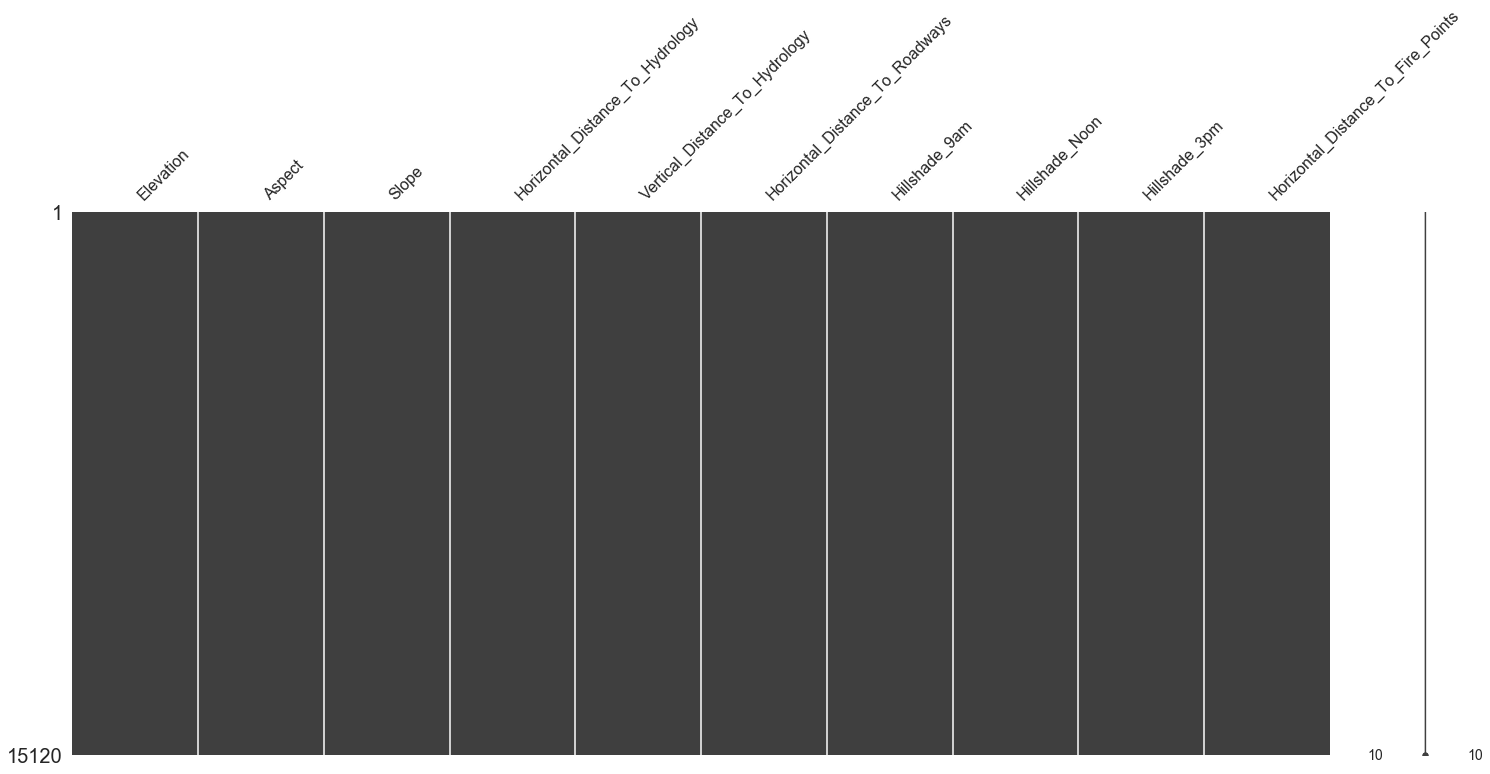

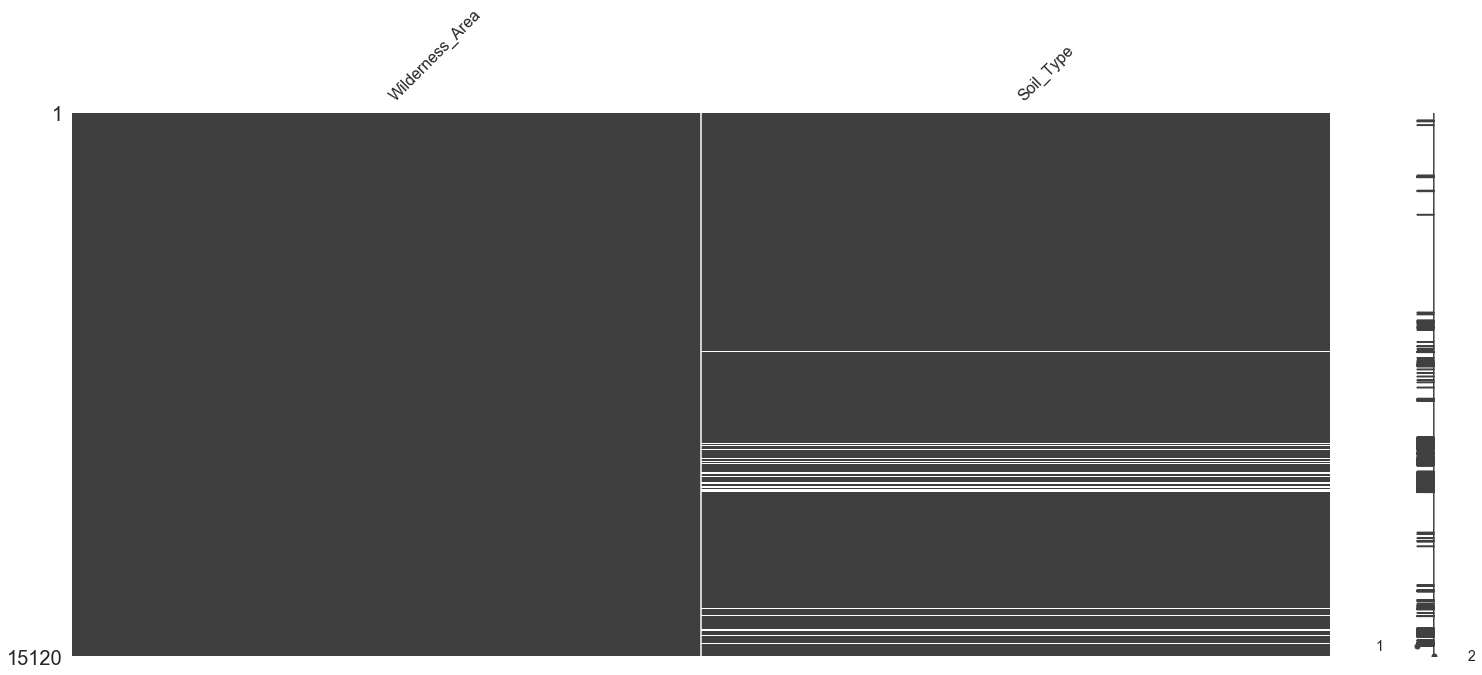

In [8]:
# check missing value
msno.matrix(train_df[numerical_features])
msno.matrix(train_df[categorical_features])
#train_df.loc[train_df['Soil_Type'].isnull()]

# Fill 'Soil_Type' missing value with 41 
train_df.Soil_Type.fillna(41, inplace=True)
#train_df.loc[train_df['Soil_Type'].isnull()]

### 2.4.2 Outlier
First using describe() to have a statistic description of the datasets.

Then using boxplot or scatterplot graph to have a visulized description of the datasets with or with outlier.
Here we didn't directly process the outlier for original training but we do use log and square root the features with outliers to figure out how to deal with the outlier if it effact significately or not.

<img src="aspect.png" width = "590" height = "400" alt="aspect.png" align=center />
<img src="scatter.png" width = "700" height = "400" alt="scatter.png" align=center />


In [0]:
train_df.describe()

Id     Elevation        Aspect         Slope  \
count  15120.00000  15120.000000  15120.000000  15120.000000   
mean    7560.50000   2749.322553    156.676653     16.501587   
std     4364.91237    417.678187    110.085801      8.453927   
min        1.00000   1863.000000      0.000000      0.000000   
25%     3780.75000   2376.000000     65.000000     10.000000   
50%     7560.50000   2752.000000    126.000000     15.000000   
75%    11340.25000   3104.000000    261.000000     22.000000   
max    15120.00000   3849.000000    360.000000     52.000000   

       Horizontal_Distance_To_Hydrology  Vertical_Distance_To_Hydrology  \
count                      15120.000000                    15120.000000   
mean                         227.195701                       51.076521   
std                          210.075296                       61.239406   
min                            0.000000                     -146.000000   
25%                           67.000000                        5.000000   
50%                          180.000000                       32.000000   
75%                          330.000000                       79.000000   
max                         1343.000000                      554.000000   

       Horizontal_Distance_To_Roadways  Hillshade_9am  Hillshade_Noon  \
count                     15120.000000   15120.000000    15120.000000   
mean                       1714.023214     212.704299      218.965608   
std                        1325.066358      30.561287       22.801966   
min                           0.000000       0.000000       99.000000   
25%                         764.000000     196.000000      207.000000   
50%                        1316.000000     220.000000      223.000000   
75%                        2270.000000     235.000000      235.000000   
max                        6890.000000     254.000000      254.000000   

       Hillshade_3pm  ...   Soil_Type34   Soil_Type35   Soil_Type36  \
count   15120.000000  ...  15120.000000  15120.000000  15120.000000   
mean      135.091997  ...      0.001455      0.006746      0.000661   
std        45.895189  ...      0.038118      0.081859      0.025710   
min         0.000000  ...      0.000000      0.000000      0.000000   
25%       106.000000  ...      0.000000      0.000000      0.000000   
50%       138.000000  ...      0.000000      0.000000      0.000000   
75%       167.000000  ...      0.000000      0.000000      0.000000   
max       248.000000  ...      1.000000      1.000000      1.000000   

        Soil_Type37   Soil_Type38   Soil_Type39   Soil_Type40    Cover_Type  \
count  15120.000000  15120.000000  15120.000000  15120.000000  15120.000000   
mean       0.002249      0.048148      0.043452      0.030357      4.000000   
std        0.047368      0.214086      0.203880      0.171574      2.000066   
min        0.000000      0.000000      0.000000      0.000000      1.000000   
25%        0.000000      0.000000      0.000000      0.000000      2.000000   
50%        0.000000      0.000000      0.000000      0.000000      4.000000   
75%        0.000000      0.000000      0.000000      0.000000      6.000000   
max        1.000000      1.000000      1.000000      1.000000      7.000000   

       Wilderness_Area    Soil_Type  
count     15120.000000  15120.00000  
mean          2.800397     19.20172  
std           1.119832     12.67810  
min           1.000000      1.00000  
25%           2.000000     10.00000  
50%           3.000000     17.00000  
75%           4.000000     30.00000  
max           4.000000     41.00000  

[8 rows x 58 columns]

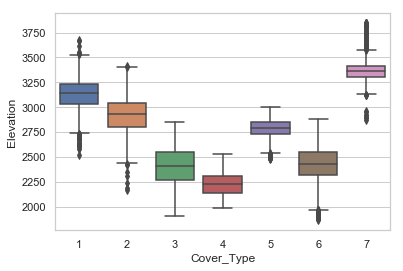

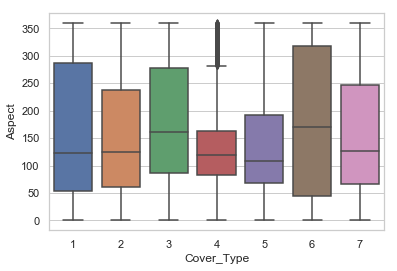

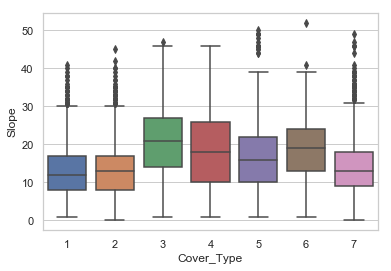

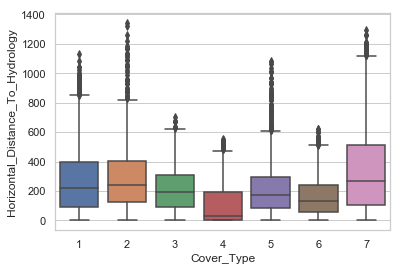

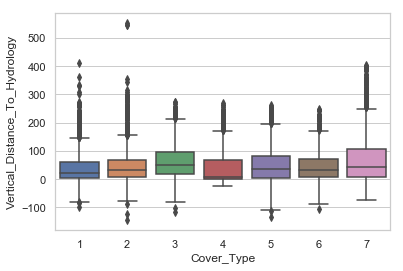

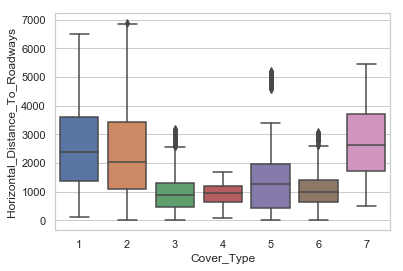

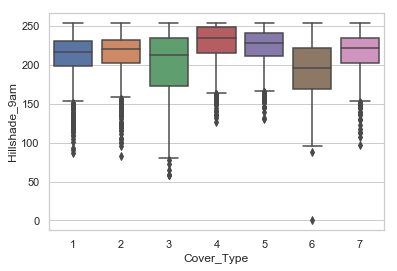

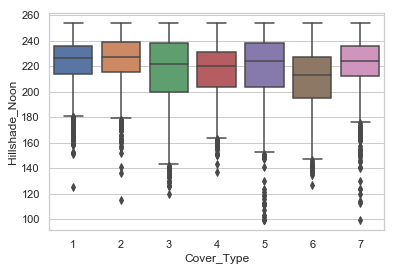

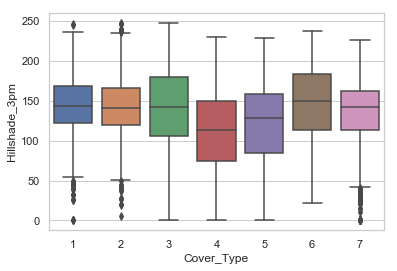

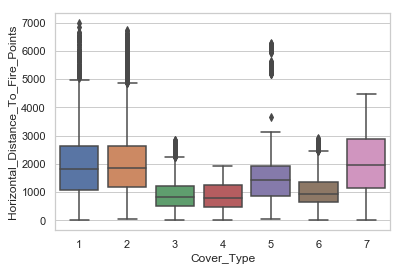

In [0]:
def draw_boxplot_train(feature_name):
    sns.boxplot(x= train_df['Cover_Type'], y = train_df[feature_name], data= train_df)
    plt.show()
    
for feature in numerical_features:
    #draw_boxplot_train(feature)

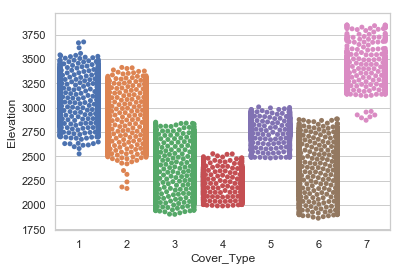

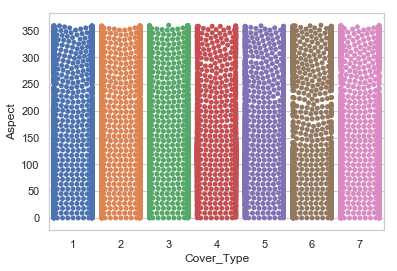

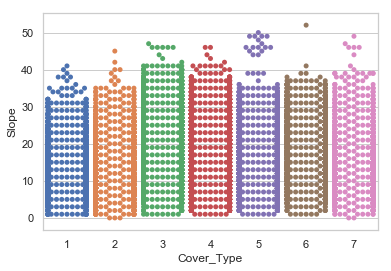

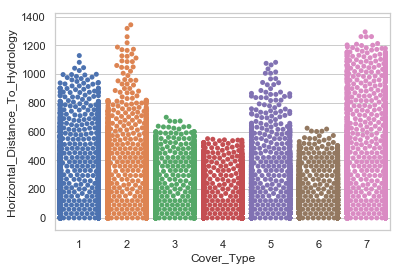

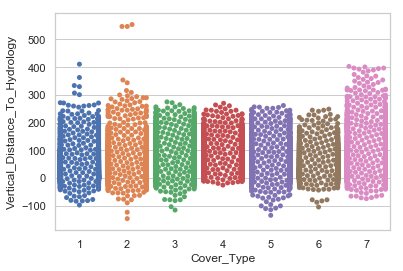

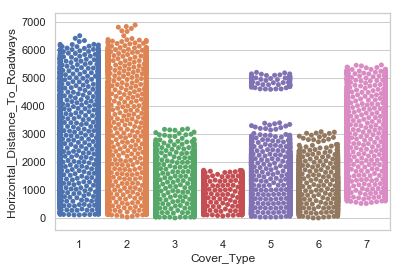

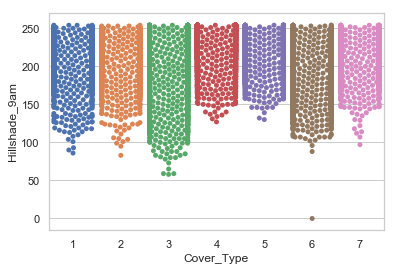

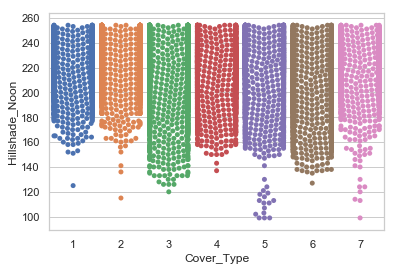

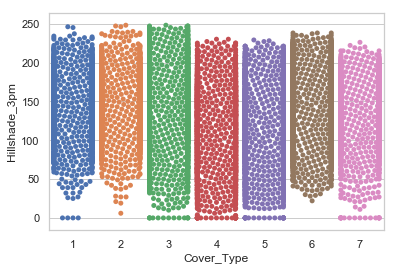

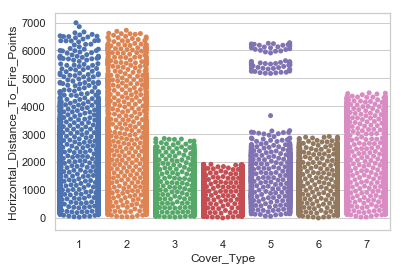

In [0]:
# Scatter plot for numerical features
def draw_scatter_train(feature_name):
    sns.swarmplot(y=train_df[feature_name], x= train_df['Cover_Type'])
    plt.show()
    
for feature in numerical_features:
    #draw_scatter_train(feature)

### 2.4  Data Visualisation
We mostly use Matplotlib and Seaborn to plot the data for visualisation. We have picked several features like Elevation,Slop, Soil Type and Wilderness Type showing in visualised graph to descripe the data. Here we pick some of the plot graphs to briefly descript the data.

To be clear we choose integer 1 - 7 to label the forest type instead of their actual name: 1:Spruce/Fir,2:Lodgepole Pine,3:Ponderosa Pine,4 : Cottonwood/Willow,5 : Aspen,6:Douglas-fir,7:Krummholz

Let us look at the correlation plots of the twelve variables first. 
<img src="newplot.png" width = "1000" height = "1000" alt="newplot.png" align=center />

The training data was not a simple random sample of the entire dataset, but a stratified sample of the seven forest classes. The training data was equally distributed among the seven classes. And we can tell the figue that the most high elevation instants are belongs to type Krummholz near 4000 meters while type Cottonwood/Willow is in the oppsite near 2200 meters.
<img src="diselevation.png" width = "600" height = "400" alt="diselevation.png" align=center />
<!--<img src="dis.png" width = "600" height = "400" alt="dis.png" align=center />-->
Some forest tpyes seperation by mean elevation is clearly visible in the following plots.
 <img src="meanEvevation.png" width = "600" height = "400" alt="meanEvevation.png" align=center />
Within the training data, the presence of certain soil types reduces the probability of observing certain cover types. Soil type 7 and 15 had no observations in the training data. For the purposes of modeling, we had to ignore these features.
 <img src="SoilType.png" width = "600" height = "400" alt="SoilType.png" align=center />
Across Wilderness areas, there seems to be some class seperation. Tpye4 Cottonwood Willow covers are found only in  Type4 Cache la Poudre areas and Tpye2 Neota areas comprises of only Type1 Spruce-fir, Type7 Krummholz, and Type2 Lodgepole Pine covers. (1:'Rawah',2:'Neota',3:'Comanche Peak',4:'Cache la Poudre')
<img src="wilderness.png" width = "600" height = "400" alt="wilderness.png" align=center />
<!--<img src="WildernessArea.png" width = "600" height = "400" alt="WildernessArea.png" align=center />-->
The classes also spread on mean slope as following plots.
 <img src="meanSlope.png" width = "600" height = "400" alt="meanSlope.png" align=center />


In [9]:
sns.set_context({"figure.figsize":(5,5)}) 
colors=[1,2,3,4,5,6,7]
dim=["Elevation","Aspect","Slope","Horizontal_Distance_To_Hydrology","Vertical_Distance_To_Hydrology","Horizontal_Distance_To_Roadways","Hillshade_9am","Hillshade_Noon","Hillshade_3pm","Horizontal_Distance_To_Fire_Points", "Wilderness_Area","Soil_Type"]
lab_dic={"Elevation":"Elevation","Aspect":"Aspect","Slope":"Slope","Horizontal_Distance_To_Hydrology":"HD2Hydr","Vertical_Distance_To_Hydrology":"VD2Hydr","Horizontal_Distance_To_Roadways":"HD2Road","Hillshade_9am":"HS_9am","Hillshade_Noon":"HS_N","Hillshade_3pm":"HS_3pm","Horizontal_Distance_To_Fire_Points":"HD2FP", "Wilderness_Area":"WA","Soil_Type":"ST"}
fig = px.scatter_matrix(train_df, dimensions=dim , labels=lab_dic, color="Cover_Type",width=2000,height=2000)
fig.update_traces(diagonal_visible=False)
fig.show()

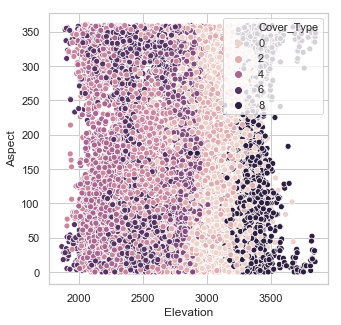

In [0]:
sns.scatterplot(x = train_df['Elevation'], y = train_df['Aspect'],hue=train_df['Cover_Type'])

Text(0, 0.5, 'Mean Elevation')

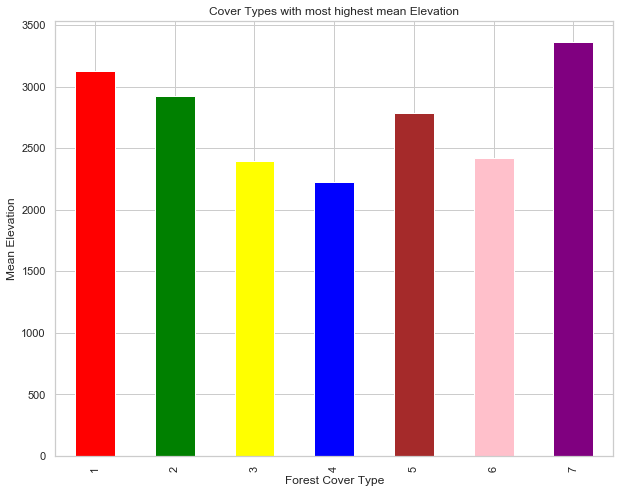

In [0]:
sns.set_context({"figure.figsize":(10,8)}) 
sp = train_df.groupby("Cover_Type").Elevation.mean().plot.bar(color=["red","green","yellow","blue","brown","pink","purple"],title="Cover Types with most highest mean Elevation")
sp.set_xlabel("Forest Cover Type")
sp.set_ylabel("Mean Elevation")

Text(0, 0.5, 'Mean Slope')

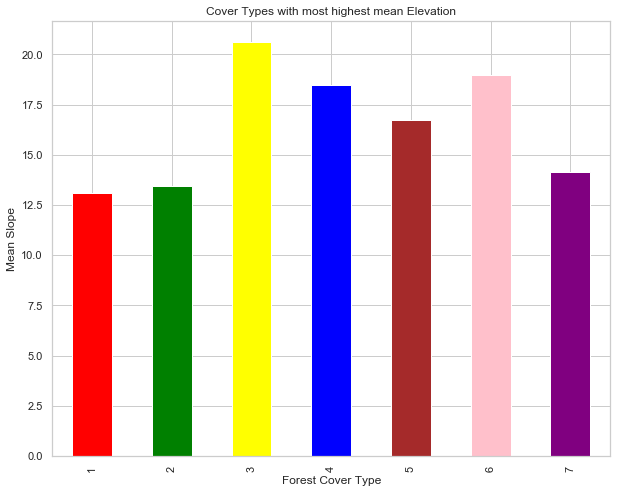

In [0]:
sp = train_df.groupby("Cover_Type").Slope.mean()[:7].plot.bar(color=["red","green","yellow","blue","brown","pink","purple"],title="Cover Types with most highest mean Elevation")
sp.set_xlabel("Forest Cover Type")
sp.set_ylabel("Mean Slope")

[Text(0, 0.5, 'Percentage of Cover Types'),
 Text(0.5, 0, 'Wilderness Area Type'),
 Text(0.5, 1.0, 'Percentage of Cover Types According to Wilderness Area ')]

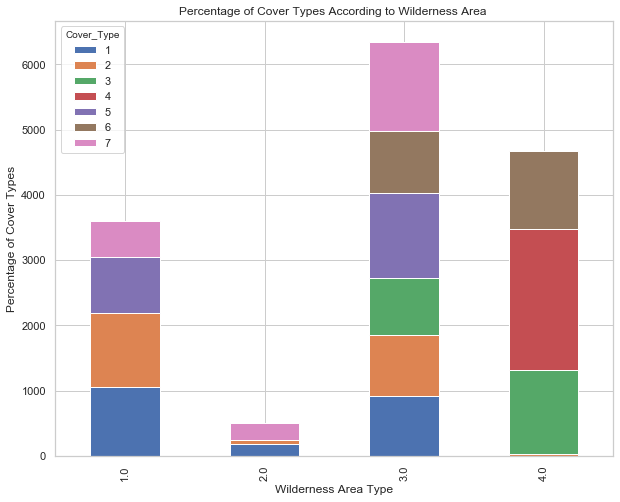

In [0]:
props = train_df.groupby("Wilderness_Area")['Cover_Type'].value_counts().unstack()
plt=props.plot(kind='bar', stacked='True')
plt.set(xlabel='Wilderness Area Type', ylabel='Percentage of Cover Types',title = "Percentage of Cover Types According to Wilderness Area ")

[Text(0, 0.5, 'Percentage of Cover Types'),
 Text(0.5, 0, 'Soil Type'),
 Text(0.5, 1.0, 'Percentage of Cover Types According to Soil Type ')]

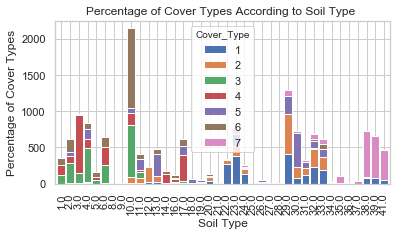

In [0]:
sns.set_context({"figure.figsize":(10,8)}) 
props = train_df.groupby("Soil_Type")['Cover_Type'].value_counts().unstack()
plt=props.plot(kind='bar', stacked='True',width=.90,figsize=(6,3))
plt.set(xlabel='Soil Type', ylabel='Percentage of Cover Types',title = "Percentage of Cover Types According to Soil Type ")

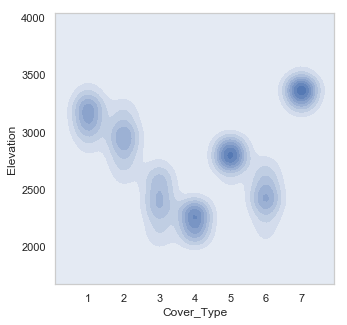

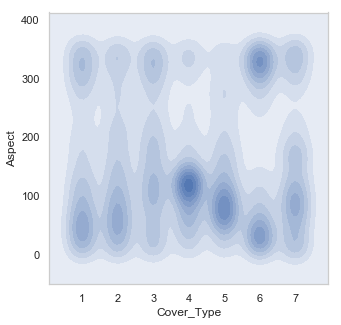

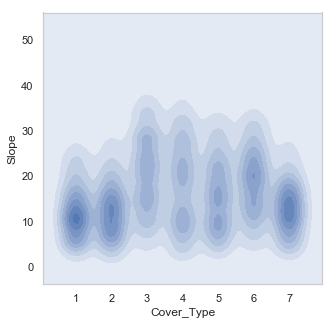

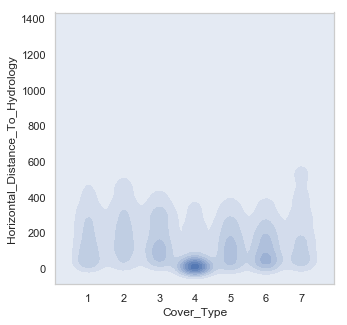

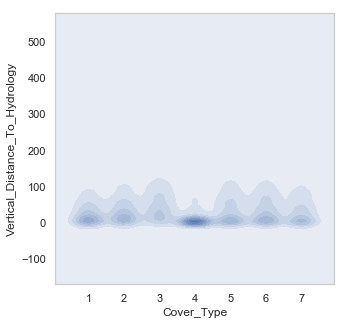

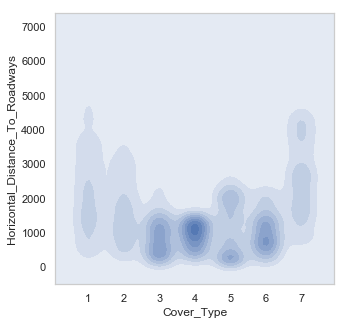

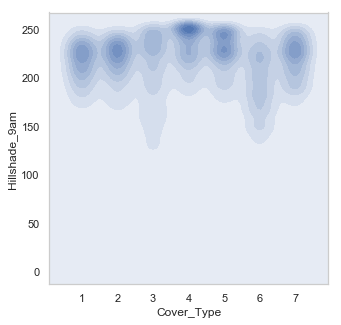

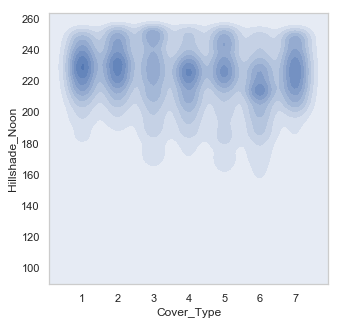

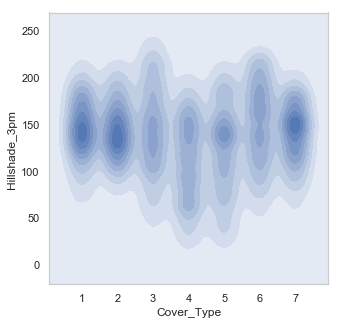

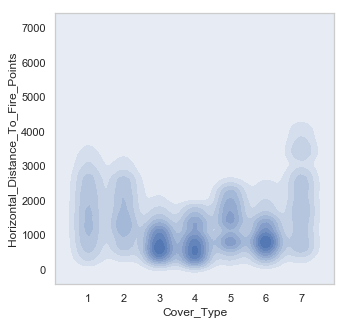

In [0]:
def draw_kde_train(feature_name):
    sns.kdeplot(train_df['Cover_Type'],train_df[feature_name], shade=True)
    plt.show()
    
for feature in numerical_features:
    #draw_kde_train(feature)

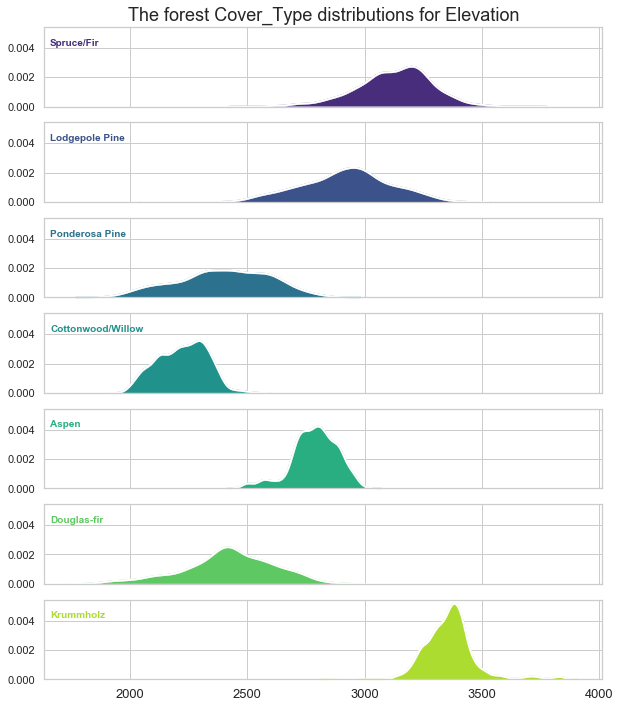

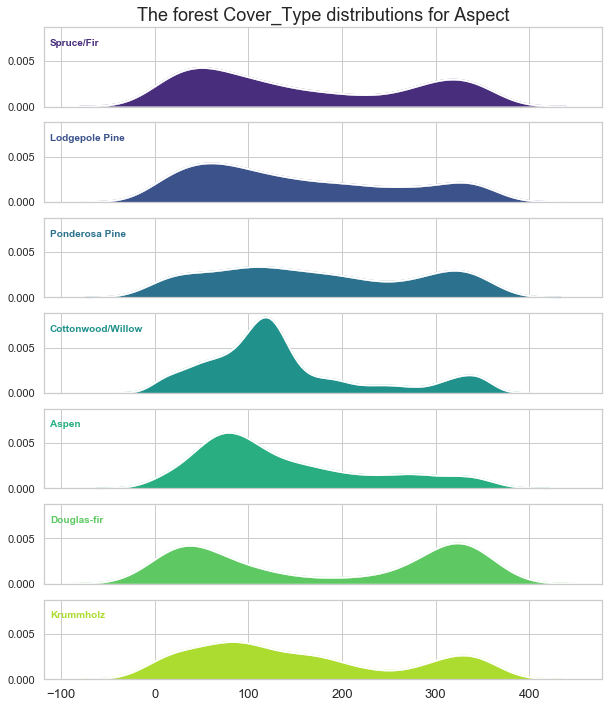

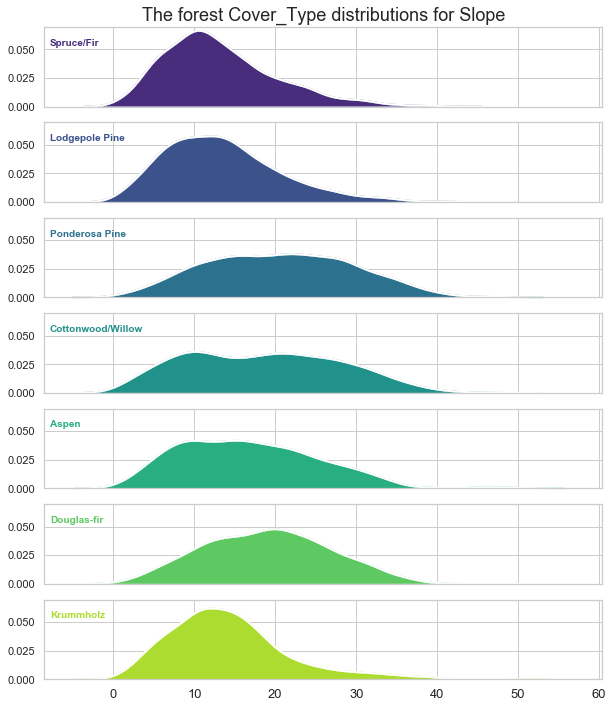

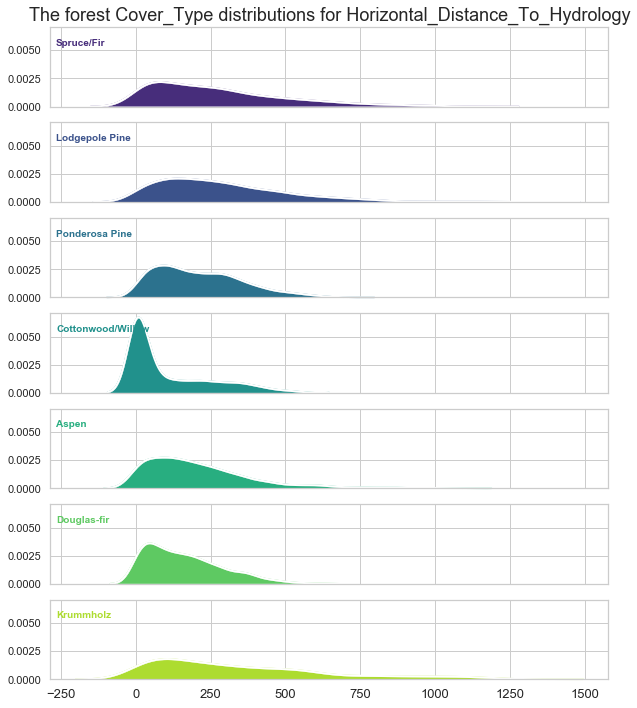

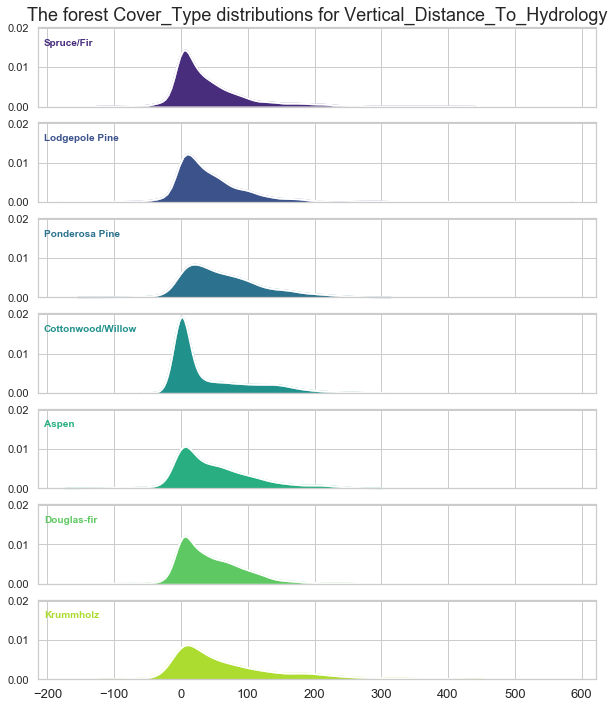

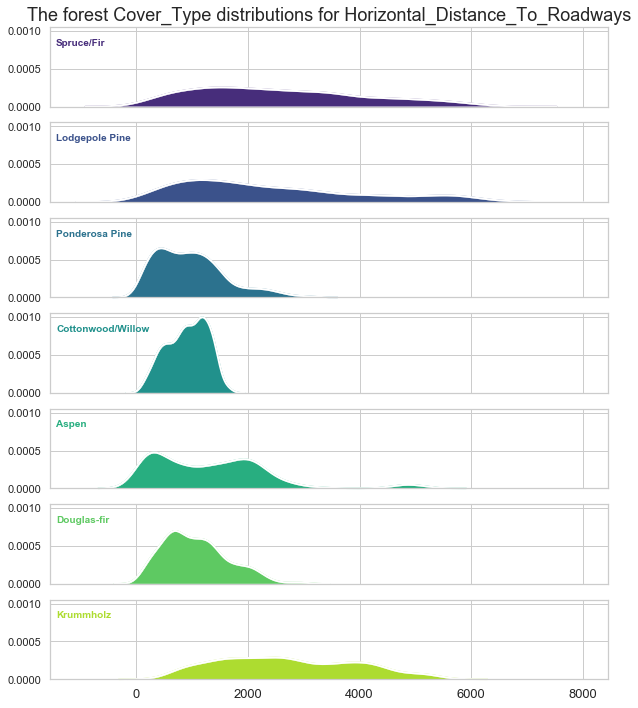

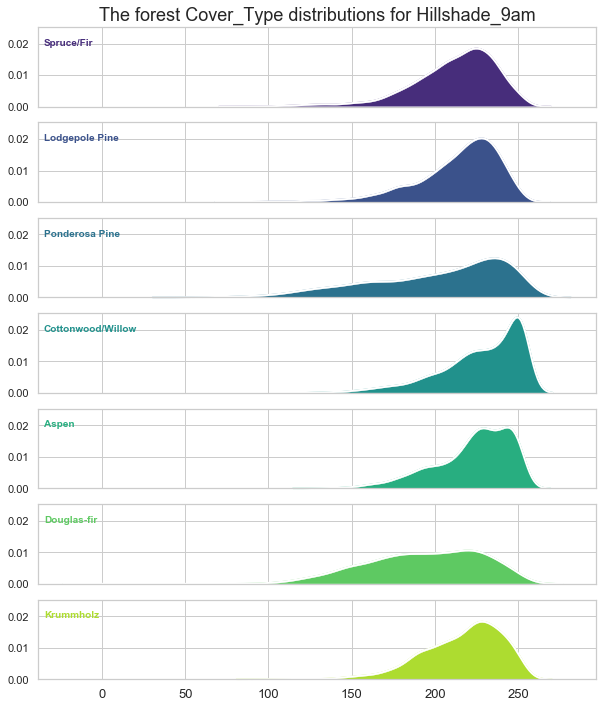

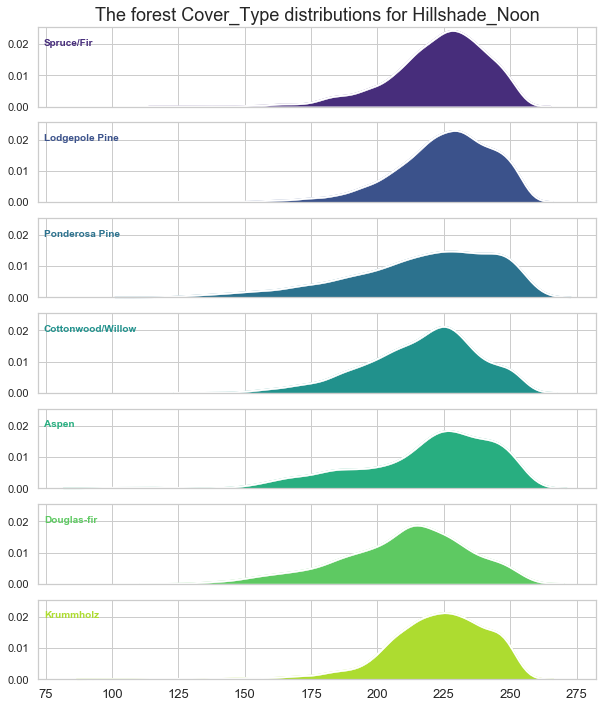

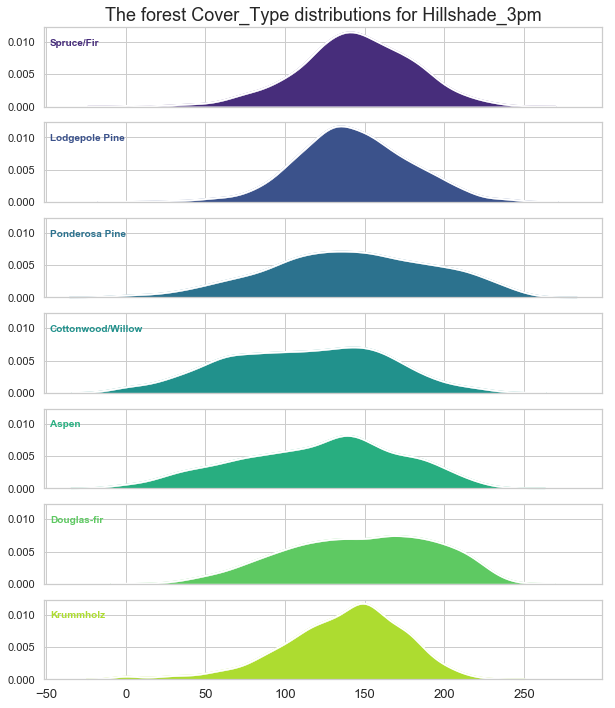

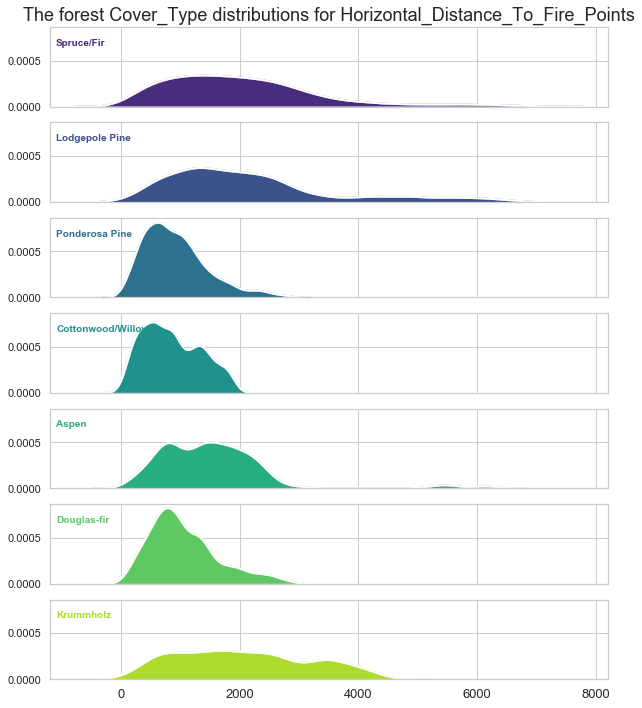

In [0]:
# Visualize traind distibution by caregorical feature
def draw_kde_cat_feat(feature_name, cat_feature_name, cat_feature_real_name):
    cat_feat_n = train_df[cat_feature_name].nunique()
    palette = sns.color_palette("viridis",cat_feat_n)
    fig, ax = plt.subplots(nrows=cat_feat_n, ncols=1, figsize=(10, 12), sharex=True, sharey=True)
    ax = ax.flatten()
    for i in range(0,cat_feat_n):
        sns.kdeplot(train_df[train_df[cat_feature_name] == i+1][feature_name].values, clip_on=False, shade=True, alpha=1, lw=1.5, color=palette[i], ax=ax[i])
        sns.kdeplot(train_df[train_df[cat_feature_name] == i+1][feature_name].values, clip_on=False, color="w", lw=2, ax=ax[i])
        ax[i].text(0.01, 0.8, cat_feature_real_name[i+1], fontweight="bold", color=palette[i], ha="left", va="center", transform=ax[i].transAxes)
    ax[0].set_title('The forest ' + cat_feature_name + ' distributions for ' + feature_name, fontsize=18);
    ax[cat_feat_n-1].tick_params(axis='x',labelsize=13)
    
# forest cover type distribution
for feature in numerical_features:
    #draw_kde_cat_feat(feature, 'Cover_Type', cover_type)   

In [16]:
CoverType = []
CoverType = train_df['Cover_Type']
CoverType.head()

0    5
1    5
2    2
3    2
4    5
Name: Cover_Type, dtype: int64

In [17]:
# the original features after transformed Wilderness_Area & Soil_Type
data_A = pd.DataFrame(train_df, columns = ['Elevation', 'Aspect', 'Slope',
       'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology',
       'Horizontal_Distance_To_Roadways', 'Hillshade_9am', 'Hillshade_Noon',
       'Hillshade_3pm', 'Horizontal_Distance_To_Fire_Points','Wilderness_Area', 'Soil_Type','Cover_Type'])
data_A.head()
# data_A.shape
# data_A.to_csv('data_A.csv',index = None)

Elevation  Aspect  Slope  Horizontal_Distance_To_Hydrology  \
0       2596      51      3                               258   
1       2590      56      2                               212   
2       2804     139      9                               268   
3       2785     155     18                               242   
4       2595      45      2                               153   

   Vertical_Distance_To_Hydrology  Horizontal_Distance_To_Roadways  \
0                               0                              510   
1                              -6                              390   
2                              65                             3180   
3                             118                             3090   
4                              -1                              391   

   Hillshade_9am  Hillshade_Noon  Hillshade_3pm  \
0            221             232            148   
1            220             235            151   
2            234             238            135   
3            238             238            122   
4            220             234            150   

   Horizontal_Distance_To_Fire_Points  Wilderness_Area  Soil_Type  Cover_Type  
0                                6279              1.0       29.0           5  
1                                6225              1.0       29.0           5  
2                                6121              1.0       12.0           2  
3                                6211              1.0       30.0           2  
4                                6172              1.0       29.0           5

### 2.5 Feature Engineering

Expcet the original dataset, we generate some new features for training as a comparision dateset.
To observe the values in columns, we tend to square root the large value to narrow the effection and log the small values in columns to relax the effection. To average the similar columns into one column and transfer numerical value to categorical value for future using. And also do the normolization.

#### New Features
<strong>sqrt_Elevation</strong>: - Square root the value of Elevation in meters, <strong>numerical</strong> <br>
<strong>sqrt_Horizontal_Distance_To_Fire_Points</strong>: Square root the value of Horizontal_Distance_To_Fire_Points  ,<strong>numerical</strong> <br>
<strong>sqrt_Horizontal_Distance_To_Roadways</strong>: Square root the value of Horizontal_Distance_To_Roadways, <strong>numerical</strong><br>
<strong>log_Slope</strong>: log the value of feature Slope, <strong>numerical</strong><br>
<strong>mean_Hillshade</strong>: have the mean value of Hillshade_9am & Hillshade_Noon & Hillshade_3pm,<strong>numerical</strong><br>
<strong>aspect_Direction</strong>: transfer the integer degree to eight categorical label from 1 to 8. Values[1 = north facing (338-22),2 =nw facing (23 - 67), 3=west facing (68 - 112), 4 =sw facing (113-157), 5 =south facing (158-202), 6 =se facing (203 - 247), 7 = east facing (248-292), 8=ne facing (293-337) ,<strong>categorical</strong><br>

In [18]:
sqrt_Elevation = np.sqrt(train_df['Elevation'])
# sqrt_Elevation 
sqrt_Horizontal_Distance_To_Fire_Points = np.sqrt(train_df['Horizontal_Distance_To_Fire_Points'])
# sqrt_Horizontal_Distance_To_Fire_Points
sqrt_Horizontal_Distance_To_Roadways = np.sqrt(train_df['Horizontal_Distance_To_Roadways'])
# sqrt_Horizontal_Distance_To_Roadways
# log_slope = np.log(train_df['Slope']) # possibly 0 in value

log_slope = np.log(train_df['Slope'] - (min(train_df['Slope']) - 1)) 

mean_Hillshade = (train_df.Hillshade_9am + train_df.Hillshade_Noon +train_df.Hillshade_3pm)/3
# mean_Hillshade

In [19]:
#1 = [338,22] ; 2 = [23, 67], 3= [68, 112], 4 =[113,157], 5 = [158,202], 6 = [203,247], 7 = [248,292], 8=[293,337]  
aspect_Direction = []
for i in range(len(train_df['Aspect'])):
    #print(i, train_df['Aspect'][i])
    if train_df['Aspect'][i] >= 330 or train_df['Aspect'][i] <= 22:
        aspect_Direction.append(1)
    elif train_df['Aspect'][i] >= 23 and train_df['Aspect'][i] <= 67:
        aspect_Direction.append(2)
    elif train_df['Aspect'][i] >= 68 and train_df['Aspect'][i] <= 112:
        aspect_Direction.append(3)
    elif train_df['Aspect'][i] >= 113 and train_df['Aspect'][i] <= 157:
        aspect_Direction.append(4)
    elif train_df['Aspect'][i] >= 158 and train_df['Aspect'][i] <= 202:
        aspect_Direction.append(5)
    elif train_df['Aspect'][i] >= 203 and train_df['Aspect'][i] <= 247:
        aspect_Direction.append(6)
    elif train_df['Aspect'][i] >= 248 and train_df['Aspect'][i] <= 292:
        aspect_Direction.append(7)
    elif train_df['Aspect'][i] >= 293 and train_df['Aspect'][i] <= 337:
        aspect_Direction.append(8)


### 2.6 Normalization
To change the values of numeric columns in the dataset to a common scale, without distorting differences in the ranges of values we do th normalization on data B only because it was containing floating porint values.

In [20]:
zippedList =  list(zip(sqrt_Elevation, sqrt_Horizontal_Distance_To_Fire_Points,sqrt_Horizontal_Distance_To_Roadways, log_slope, mean_Hillshade,aspect_Direction,CoverType))

data_B = pd.DataFrame(zippedList, columns =['sqrt_Elevation','sqrt_Horizontal_Distance_To_Fire_Points', 
                          'sqrt_Horizontal_Distance_To_Roadways','log_slope','mean_Hillshade','aspect_Direction','Cover_Type']) 

data_B.isnull().values.any()

cols_to_norm = ['sqrt_Elevation','sqrt_Horizontal_Distance_To_Fire_Points', 
                          'sqrt_Horizontal_Distance_To_Roadways','log_slope','mean_Hillshade']
data_B[cols_to_norm] = data_B[cols_to_norm].apply(lambda x: (x - x.min()) / (x.max() - x.min()))

data_B.head()
# data_B.shape
# data_B.to_csv('data_B.csv',index = None)

sqrt_Elevation  sqrt_Horizontal_Distance_To_Fire_Points  \
0        0.412573                                 0.947575   
1        0.409452                                 0.943491   
2        0.518615                                 0.935577   
3        0.509095                                 0.942430   
4        0.412053                                 0.939466   

   sqrt_Horizontal_Distance_To_Roadways  log_slope  mean_Hillshade  \
0                              0.272067   0.349167        0.876543   
1                              0.237915   0.276708        0.891975   
2                              0.679366   0.579954        0.895062   
3                              0.669684   0.741618        0.867284   
4                              0.238220   0.276708        0.885802   

   aspect_Direction  Cover_Type  
0                 2           5  
1                 2           5  
2                 4           2  
3                 4           2  
4                 2           5

In [21]:
import pandas as pd
from pandas import read_csv
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

# Load dataset
data_A = pd.read_csv('data_A.csv')
data_A = data_A.drop("Cover_Type", axis=1)
data_A.head()

Elevation  Aspect  Slope  Horizontal_Distance_To_Hydrology  \
0       2596      51      3                               258   
1       2590      56      2                               212   
2       2804     139      9                               268   
3       2785     155     18                               242   
4       2595      45      2                               153   

   Vertical_Distance_To_Hydrology  Horizontal_Distance_To_Roadways  \
0                               0                              510   
1                              -6                              390   
2                              65                             3180   
3                             118                             3090   
4                              -1                              391   

   Hillshade_9am  Hillshade_Noon  Hillshade_3pm  \
0            221             232            148   
1            220             235            151   
2            234             238            135   
3            238             238            122   
4            220             234            150   

   Horizontal_Distance_To_Fire_Points  Wilderness_Area  Soil_Type  
0                                6279              1.0       29.0  
1                                6225              1.0       29.0  
2                                6121              1.0       12.0  
3                                6211              1.0       30.0  
4                                6172              1.0       29.0

In [22]:
data_B = pd.read_csv('data_B.csv')
data_B.head()

sqrt_Elevation  sqrt_Horizontal_Distance_To_Fire_Points  \
0        0.412573                                 0.947575   
1        0.409452                                 0.943491   
2        0.518615                                 0.935577   
3        0.509095                                 0.942430   
4        0.412053                                 0.939466   

   sqrt_Horizontal_Distance_To_Roadways  log_slope  mean_Hillshade  \
0                              0.272067   0.349167        0.876543   
1                              0.237915   0.276708        0.891975   
2                              0.679366   0.579954        0.895062   
3                              0.669684   0.741618        0.867284   
4                              0.238220   0.276708        0.885802   

   aspect_Direction  Cover_Type  
0                 2           5  
1                 2           5  
2                 4           2  
3                 4           2  
4                 2           5

In [23]:
data_C = pd.concat([data_A, data_B], axis=1)
data_C.head()

Elevation  Aspect  Slope  Horizontal_Distance_To_Hydrology  \
0       2596      51      3                               258   
1       2590      56      2                               212   
2       2804     139      9                               268   
3       2785     155     18                               242   
4       2595      45      2                               153   

   Vertical_Distance_To_Hydrology  Horizontal_Distance_To_Roadways  \
0                               0                              510   
1                              -6                              390   
2                              65                             3180   
3                             118                             3090   
4                              -1                              391   

   Hillshade_9am  Hillshade_Noon  Hillshade_3pm  \
0            221             232            148   
1            220             235            151   
2            234             238            135   
3            238             238            122   
4            220             234            150   

   Horizontal_Distance_To_Fire_Points  Wilderness_Area  Soil_Type  \
0                                6279              1.0       29.0   
1                                6225              1.0       29.0   
2                                6121              1.0       12.0   
3                                6211              1.0       30.0   
4                                6172              1.0       29.0   

   sqrt_Elevation  sqrt_Horizontal_Distance_To_Fire_Points  \
0        0.412573                                 0.947575   
1        0.409452                                 0.943491   
2        0.518615                                 0.935577   
3        0.509095                                 0.942430   
4        0.412053                                 0.939466   

   sqrt_Horizontal_Distance_To_Roadways  log_slope  mean_Hillshade  \
0                              0.272067   0.349167        0.876543   
1                              0.237915   0.276708        0.891975   
2                              0.679366   0.579954        0.895062   
3                              0.669684   0.741618        0.867284   
4                              0.238220   0.276708        0.885802   

   aspect_Direction  Cover_Type  
0                 2           5  
1                 2           5  
2                 4           2  
3                 4           2  
4                 2           5

### 2.7 Feature Importance
To view the importance of all features we have ploted a bar plot to visualize and see features with most and least importance. we have done feature importance on data C (combined dataset of oringinal and our extracted features).<br> 
 
The bar plot above shows the importance of every feature. We can see our features from sqrt_Elevation to aspect_Direction. The 'sqrt_Elevation','sqrt_Horizontal_Distance_To_Roadways','sqrt_Horizontal_Distance_To_Fire_Points', and 'aspect_Direction' have pretty good importance amongst all other.<>
 
 <img src="feature_importances.png" width = "800" height = "400" alt="meanSlope.png" align=center />

In [24]:
# Feature Importance with Extra Trees Classifier
import pandas as pd
from pandas import read_csv
from matplotlib import pyplot
from sklearn.ensemble import ExtraTreesClassifier
# load data
names = ['Elevation','Aspect','Slope','Horizontal_Distance_To_Hydrology','Vertical_Distance_To_Hydrology','Horizontal_Distance_To_Roadways','Hillshade_9am','Hillshade_Noon','Hillshade_3pm','Horizontal_Distance_To_Fire_Points','Wilderness_Area','Soil_Type','sqrt_Elevation','sqrt_Horizontal_Distance_To_Fire_Points','sqrt_Horizontal_Distance_To_Roadways','log_slope','mean_Hillshade','aspect_Direction','Cover_Type']
dataframe = pd.read_csv('data_C-backup.csv')
# dataframe = read_csv(url, names=names)
array = dataframe.values
X = array[:,0:18]
Y = array[:,18]
# feature extraction
model = ExtraTreesClassifier(n_estimators=200,max_features=4)
model.fit(X, Y)
print(model.feature_importances_)

[0.14638204 0.03331024 0.02431096 0.04779896 0.03585803 0.05382992
 0.03545532 0.02725607 0.02882703 0.04596523 0.07319288 0.1304204
 0.14481607 0.04453937 0.05256513 0.02299827 0.02494213 0.02753198]


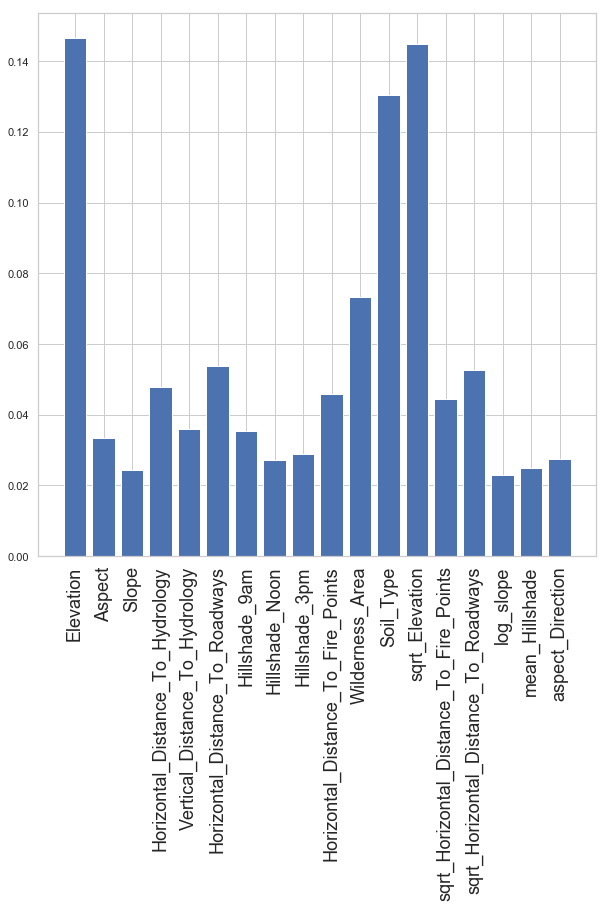

In [32]:
# plot
pyplot.bar(range(len(model.feature_importances_)), model.feature_importances_)
pyplot.xticks(range(len(model.feature_importances_)), names,rotation=90,fontsize=18)
pyplot.rcParams["figure.figsize"] = (10,10)
plt.savefig("feature_importances.png")
pyplot.show()

The bar plot above shows the importance of every feature. We can see our features from sqrt_Elevation to aspect_Direction. The 'sqrt_Elevation','sqrt_Horizontal_Distance_To_Roadways','sqrt_Horizontal_Distance_To_Fire_Points', and 'aspect_Direction' have pretty good importance amongst all other.   

# 3. Analysis: 
After data preprocessing and feature generation we have three different sets of data;
### Data A: 
This data has all original features except Wilderness_area and Soil Type which are transformed into single field for each to avoid overfitting. Therefore, there are total 11 features i-e;
<br><i>'Elevation', 'Aspect', 'Slope',  'Horizontal_Distance_To_Hydrology', ‘Vertical_Distance_To_Hydrology',  'Horizontal_Distance_To_Roadways', 'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm', 'Horizontal_Distance_To_Fire_Points','Wilderness_Area', 'Soil_Type'</i>
### Data B: 
This data has only new features which we have extracted from original ones Therefore, there are total 6 features in data B i-e;
<br><i>'sqrt_Elevation','sqrt_Horizontal_Distance_To_Fire_Points', 'sqrt_Horizontal_Distance_To_Roadways', 'log_slope', 'mean_Hillshade', 'aspect_Direction'</i>
### Data C: 
 The data C is combined dataset of original and new features. Therefore, there are total 18 features in data C.
<br><i>'Elevation', 'Aspect', 'Slope',  'Horizontal_Distance_To_Hydrology', ‘Vertical_Distance_To_Hydrology',  'Horizontal_Distance_To_Roadways', 'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm', 'Horizontal_Distance_To_Fire_Points','Wilderness_Area', 'Soil_Type', 'sqrt_Elevation','sqrt_Horizontal_Distance_To_Fire_Points', 'sqrt_Horizontal_Distance_To_Roadways', 'log_slope', 'mean_Hillshade', 'aspect_Direction'</i><br>

We evaluated same set of models with same hyperparameter tuning and experimental process on all three datasets to see which one performs better in accuracy of results. The comparisons of results of all three datasets will be discussed later in report.  


### 3.1 Methods and Algorithms used:  
We used 8 different algorithms to obtain better accuracy result including linear and nonlinear algorithms i-e;
- Logistic Regression
- K Nearest Neighbour
- Naïve Bayes
- Random Forest 
- Ada Boost 
- Decision Tree
- Extra Decision Tree
- Linear Discriminant Analysis

### 3.2 Methodology (Experimental Process):
To evaluate the best selected models with real estimates and to make sure our models are good, we split the whole data into two parts, train and test data. Train data is 80% percent and 20% which is used as unseen data for evaluating best selected models. 

The trainset is used to train the 8 different models. Since, yet we are not sure what is good model and what parameters are good to use, so to train and estimate model’s accuracy we used cross-validation process with 10 folds. In every repetition of training it holds one part for to test and rest of 9 parts as training set and continue until all are used. For each model we gave same splits for data to train using constant number in argument random_state.  

We also tried random hyperparameter tuning by passing different values for model parameter and selected the best combination that worked for best accuracy. 

Note: This same process is applied on all three different dataset A, B and C. 

After the model training, we chose one combined dataset ‘Data C’ to predict unseen data. 

Finally, two of the best models are selected to evaluate models on unseen data using confusion matrix to see what errors are made and how accurate results are predicted.  



In [33]:
# Split-out validation dataset
array = data_C.values
X = array[:,0:18]
y = array[:,18]
X_train, X_validation, Y_train, Y_validation = train_test_split(X, y, test_size=0.20, random_state=1)

Y_train = Y_train.astype('float')
Y_validator = Y_validation.astype('float')
# Spot Check Algorithms
models = []

# models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('RFC', RandomForestClassifier(n_estimators=200, max_features=4)))
# models.append(('ABC', AdaBoostClassifier(n_estimators=100, random_state=1)))
models.append(('XTC', ExtraTreesClassifier(n_estimators=200, max_features=4)))
# models.append(('LDA', LinearDiscriminantAnalysis()))
# models.append(('KNN', KNeighborsClassifier()))
# models.append(('CART', DecisionTreeClassifier()))
# models.append(('NB', GaussianNB()))

# evaluate each model in turn
results = []
names = []
for name, model in models:
    kfold = StratifiedKFold(n_splits=10, random_state=1)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))


RFC: 0.862931 (0.005848)
XTC: 0.875662 (0.008624)


### 3.3 Results and Discussion:
#### 1. Best Models Selection:

### Note: 
The training on Data A and B was done in separate jupyter notebooks. We are just showing the results here but code for training data C is here in above cell which is same used for A and B datasets. 

Running 8 algorithms on all three data we have obtained following mean accuracies for each model after 10 folds and along with standard deviation. 

| Data A | Data B | Data C |
| --- | --- | --- |
| LR: 0.618145 (0.011703)    | LR: 0.507045 (0.015532)   | LR: 0.621865 (0.011448)  |
| RFC: 0.856396 (0.007234)   | RFC: 0.801844 (0.009342)  | RFC: 0.859789 (0.007062) |
| ABC: 0.402034 (0.024779)   | ABC: 0.454200 (0.035586)  | ABC: 0.402034 (0.024779) |
| XTC: 0.865328 (0.005813)   | XTC: 0.806060 (0.007706)  | XTC: 0.868550 (0.008396) |
| LDA: 0.649976 (0.012213)   | LDA: 0.565243 (0.011496)  | LDA: 0.665029 (0.016993) |
| KNN: 0.801687 (0.011885)   | KNN: 0.715036 (0.009553)  | KNN: 0.801687 (0.011885) |
| CART: 0.776465 (0.009699)  | CART: 0.720727 (0.006517) | CART: 0.773318 (0.009592)|
| NB: 0.621292 (0.009336)    | NB: 0.602619 (0.016531)   | NB: 0.624850 (0.011958)  |

    Table 1: Mean accuracy and standard deviation of various models on each data set. 


From Table 1, we can clearly see that Random Forest (RFC) and ExtraTree (XTC) classifiers have mean accuracy higher than 80% for all data sets. The only classifier which has less than 50% accuracy is AdaBoost (ABC) classifier. The second-best performing classifier after Random Forest and ExtraTree is K Nearest Neighbor (KNN) with accuracy between 70% to 80% for all three datasets.

The best possible accuracies for merged ‘data C’ are 86% and 87% percent.

### Claim 1: 
From above table we can see that the models are also providing good enough mean accuracy of about 80% for ‘data B’ which has only 6 features (i-e extracted by us) and is as half the number of original transformed dataset ‘Data A’. 
Next, we do optimization for selected models i-e Random Forest and ExtraTree classifier. 



In [0]:
# # Compare Algorithms
# pyplot.boxplot(results, labels=names)
# pyplot.title('Algorithm Comparison')
# # pyplot.show()

#### 2.  Hyperparameters Tuning for Optimization for selected models: 
The parameters for best two algorithms are randomly changed for optimization of accuracy and results. We tried various parameter combination values for n_estimators (The number of trees in the forest), max_features (The number of features to consider when looking for the best split). 

Following are the results of accuracy with varying the two parameters. The box plots also show the comparisons of two models. A few combinations have improved accuracy a lot but also generated some outliers. We will consider the combination with best accuracy but without outliers for data C to show final unseen data prediction and discuss its results. 
#### Data A: 
n_estimators = 100, max_features = 4 <br>
RFC: 0.858543 (0.007195)<br>
XTC: 0.869462 (0.008633)<br> 
<img src="A-100-4.png" /><br>
n_estimators = 100, max_features = 5<br>
RFC: 0.861604 (0.006523)<br>
XTC: 0.874173 (0.008515)<br>
<img src="A-100-5.png" /><br>

n_estimators = 200, max_features = 4<br>
RFC: 0.858293 (0.007912)<br>
XTC: 0.867971 (0.008029)<br>
 <img src="A-200-4.png" /><br>
n_estimators = 200, max_features = 5 <br>
RFC: 0.861687 (0.004887)<br>
XTC: 0.874667 (0.006627)<br>
<img src="A-200-5.png" /><br>

#### Data B:
n_estimators = 100, max_features = 4<br>
RFC: 0.800933 (0.008953)<br>
XTC: 0.807873 (0.006499)<br>
 <img src="B-100-4.png" /><br>

n_estimators = 100, max_features = 5<br>
RFC: 0.798457 (0.010358)<br>
XTC: 0.806716 (0.005963)<br>
 <img src="B-100-5.png" /><br>

n_estimators = 200, max_features = 4 <br>
RFC: 0.802340 (0.010776)<br>
XTC: 0.808041 (0.008077)<br>
 <img src="B-200-4.png" /><br>
n_estimators = 200, max_features = 5 <br>
RFC: 0.799437 (0.010816)<br>
XTC: 0.809278 (0.006759)<br>
 <img src="B-200-5.png" /><br>

####  Data C:
n_estimators = 100, max_features = 4<br>
RFC: 0.860863 (0.006288)<br>
XTC: 0.872273 (0.006627)<br>
 <img src="C-100-4.png" /><br>
n_estimators = 100, max_features = 5<br>
RFC: 0.860120 (0.007015)<br>
XTC: 0.875742 (0.007502)<br>
 <img src="c-100-5.png" /><br>
n_estimators = 200, max_features = 4 <br>
RFC: 0.861361 (0.005322) <br>
XTC: 0.872108 (0.005867)<br>
 <img src="C-200-4.png" /><br>
n_estimators = 200, max_features = 5 <br>
RFC: 0.863509 (0.005600)<br>
XTC: 0.875666 (0.006671)<br>
 <img src="C-200-5.png" /><br>









In [34]:
xtc = RandomForestClassifier(n_estimators=200, max_features=4)
xtc.fit(X_train, Y_train)
predictions = xtc.predict(X_validation)
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.8601190476190477
[[315  66   1   0   9   1  42]
 [ 86 306  12   0  43  10   1]
 [  0   1 373  17   3  43   0]
 [  0   0   8 436   0   3   0]
 [  1   9   5   0 397   6   0]
 [  0   2  33   6   0 370   0]
 [ 14   1   0   0   0   0 404]]
              precision    recall  f1-score   support

         1.0       0.76      0.73      0.74       434
         2.0       0.79      0.67      0.73       458
         3.0       0.86      0.85      0.86       437
         4.0       0.95      0.98      0.96       447
         5.0       0.88      0.95      0.91       418
         6.0       0.85      0.90      0.88       411
         7.0       0.90      0.96      0.93       419

   micro avg       0.86      0.86      0.86      3024
   macro avg       0.86      0.86      0.86      3024
weighted avg       0.86      0.86      0.86      3024



### 4. Evaluating Best Selected Model on Unseen Data:
Finally, we chose data C to run the selected model on unseen data. We used ExtraTree classifier to prediction new instances and we got pretty good accuracy i-e, 86.4% with some errors shown in confusion matrix. Here is the output result of the experiment. 

<br><img src="Eva-CM.png"> <br>
From confusion matrix we can see that class 4 cover Type is classified with very less 
amount of errors i-e 15 instances are incorrectly classified as class 3 and 6 as class 6. 
The class 1 and 2 cover Types are having high errors as compared to the rest. We can see that 86 of the instances of Class 1 cover Type are incorrectly classified as 2 cover Type and 13 as cover Type 7. Similarly, for class 2, we have 69 incorrectly classified as class 1. The other classes have also some errors are clearly seen in matrix.   

<br><img src="Eva-Rep.png"> <br>
The above classification report shows precision, recall and F scores for each class. Since, F1 is harmonic mean of precision and recall and is important to discuss here. F1 shows how prefect the precision and recall are for every cover Type. 
Class 4 cover Type has highest F1-score from rest because from confusion matrix it has very low errors and trained model can best predict the class 4. Similarly, the second highest F1s are for class 7 and class 5 cover Types respectively. 
On the other hand, the model is not good enough in predicting class 2 and 1 cover Type with very less F score to 0.72 and 0.74.    

We also have very good overall accuracy of 86% on unseen data and which is very close to model training accuracy i-e, 87% 

### Claim 2: 
Based on all the results and prediction accuracy discussed above, we can claim that we are confident that our model can do good predication for 5 cover Types from 7 excluding cover Type 1 and 2.   


### 5. Conclusion and Future Work: 
The data from Kaggle was containing 56 columns including 4 for Widerness Area types and 40 for Soil Types. Indeed, these are 56 features but conceptually combined, it can be said they fall in 12 as total. We generated our new 6 features which in combination with original feature add in accuracy of results. From 6 new features four are one of the most important features which are shown in feature importance bar plot above. In this problem of classifying 7 cover Types of forest we have tried our best to improve accuracy by adding new features and resulting combined data set of oringinal and new features gave us accuracy of 86% on unseen data which is very close to 87% (the training accuracy using cross-validation of 10 folds). Before the training process we divided the final dataset C into two sets train and test with 20 and 80 percent repectively for final evaluation of learning. We prefered the cross-validation technique to avoid any overfitting in case. 


In future the accuracy can be more improved using Grid Hyperparameter Optimization technique to select best combination of parameters for models and trying some advanced ensemble learning to aggregate results of one.   


### <center>References</center>
[1] Kaggle.com. (2019). Forest Cover Type (Kernels Only) | Kaggle. [online] Available at: https://www.kaggle.com/c/forest-cover-type-kernels-only/data [Accessed 29 Nov. 2019].